# CISC 490 Exploratory Analysis

## Imports

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

import nltk
nltk.download()
from nltk.corpus import stopwords

import logging
from gensim.models import word2vec

from sklearn.manifold import TSNE

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


## Word2Vec

Step 1: Prepare the data.

In [249]:
train_text=pd.read_csv("data/training_text", sep="\|\|", names=["Id","Text"], skiprows=1, engine='python')
train_var=pd.read_csv("data/training_variants")
print(train_text.shape)
print(train_var.shape)

(3321, 2)
(3321, 4)


This is the first text entry. It's big!

In [169]:
print(train_text.shape)
print(train_text.columns.values)
print(train_text['Text'][0])

(3321, 2)
['Id' 'Text']
Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M sil

Method: Filters data to letters, numbers and spaces, converts all letters to lowercase and removes stopwords such as "it" and "the".

In [170]:
def clean_data(raw_text):
    letters_only = re.sub("[^a-zA-Z_0-9]", " ", raw_text)
    lowercase_only = letters_only.lower()
    words = lowercase_only.split()
    words = [w for w in words if not w in stopwords.words("english")]
    return(words)

First entry is cleaned here and displayed to show the difference. Brackets and punctuation have been removed among other things.

In [206]:
clean_train_text=[]
clean_train_text=clean_data(train_text["Text"][0])
print(clean_train_text)

cyclin dependent kinases cdks regulate variety fundamental cellular processes cdk10 stands one last orphan cdks activating cyclin identified kinase activity revealed previous work shown cdk10 silencing increases ets2 v ets erythroblastosis virus e26 oncogene homolog 2 driven activation mapk pathway confers tamoxifen resistance breast cancer cells precise mechanisms cdk10 modulates ets2 activity generally functions cdk10 remain elusive demonstrate cdk10 cyclin dependent kinase identifying cyclin activating cyclin cyclin orphan cyclin product fam58a whose mutations cause star syndrome human developmental anomaly whose features include toe syndactyly telecanthus anogenital renal malformations show star syndrome associated cyclin mutants unable interact cdk10 cyclin silencing phenocopies cdk10 silencing increasing c raf conferring tamoxifen resistance breast cancer cells cdk10 cyclin phosphorylates ets2 vitro cells positively controls ets2 degradation proteasome ets2 protein levels increas

In [173]:
tokenizer=nltk.data.load('tokenizers/punkt/english.pickle')

In [174]:
def train_sentences(train_text, tokenizer):
    raw_sentences=tokenizer.tokenize(train_text.strip())
    s_list=[]
    for sentence in raw_sentences:
        if(len(sentence) > 1):
            s_list.append(clean_data(sentence))
    return s_list

In [184]:
sentences=[]
train_text_small=train_text[0:100]
for text in train_text_small["Text"]:
    sentences+=train_sentences(text, tokenizer)
print(len(sentences))

32449


In [185]:
print(sentences[0])

['cyclin', 'dependent', 'kinases', 'cdks', 'regulate', 'variety', 'fundamental', 'cellular', 'processes']


In [193]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

model=word2vec.Word2Vec(sentences, workers=4, size=300, min_count=50, window=10, sample=1e-3)
model.init_sims(replace=True)
model.save("test")

2018-01-28 20:28:23,501 : INFO : collecting all words and their counts
2018-01-28 20:28:23,504 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-01-28 20:28:23,605 : INFO : PROGRESS: at sentence #10000, processed 167169 words, keeping 7593 word types
2018-01-28 20:28:23,660 : INFO : PROGRESS: at sentence #20000, processed 327391 words, keeping 11834 word types
2018-01-28 20:28:23,738 : INFO : PROGRESS: at sentence #30000, processed 494754 words, keeping 17095 word types
2018-01-28 20:28:23,750 : INFO : collected 18301 word types from a corpus of 533809 raw words and 32449 sentences
2018-01-28 20:28:23,752 : INFO : Loading a fresh vocabulary
2018-01-28 20:28:23,785 : INFO : min_count=50 retains 1891 unique words (10% of original 18301, drops 16410)
2018-01-28 20:28:23,787 : INFO : min_count=50 leaves 415118 word corpus (77% of original 533809, drops 118691)
2018-01-28 20:28:23,812 : INFO : deleting the raw counts dictionary of 18301 items
2018-01-28 20:28:2

In [194]:
model.wv.vocab
vocab=list(model.wv.vocab)
x = model[vocab]

tsne = TSNE(n_components=2)
x_tsne = tsne.fit_transform(x)

df = pd.DataFrame(x_tsne, index=vocab, columns=['x', 'y'])
print(df[0:10])

C:\Users\Lena\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


                   x          y
cyclin     10.005008 -42.739834
dependent   3.201542 -32.446091
kinases    -1.095874 -37.961250
cdks       -0.337353 -34.480782
regulate   -0.399652 -34.893223
variety   -23.808090 -27.853628
cellular   -0.211859 -31.383402
processes -28.715918 -25.974218
cdk10      12.154539 -41.613880
one       -12.313867  10.216785


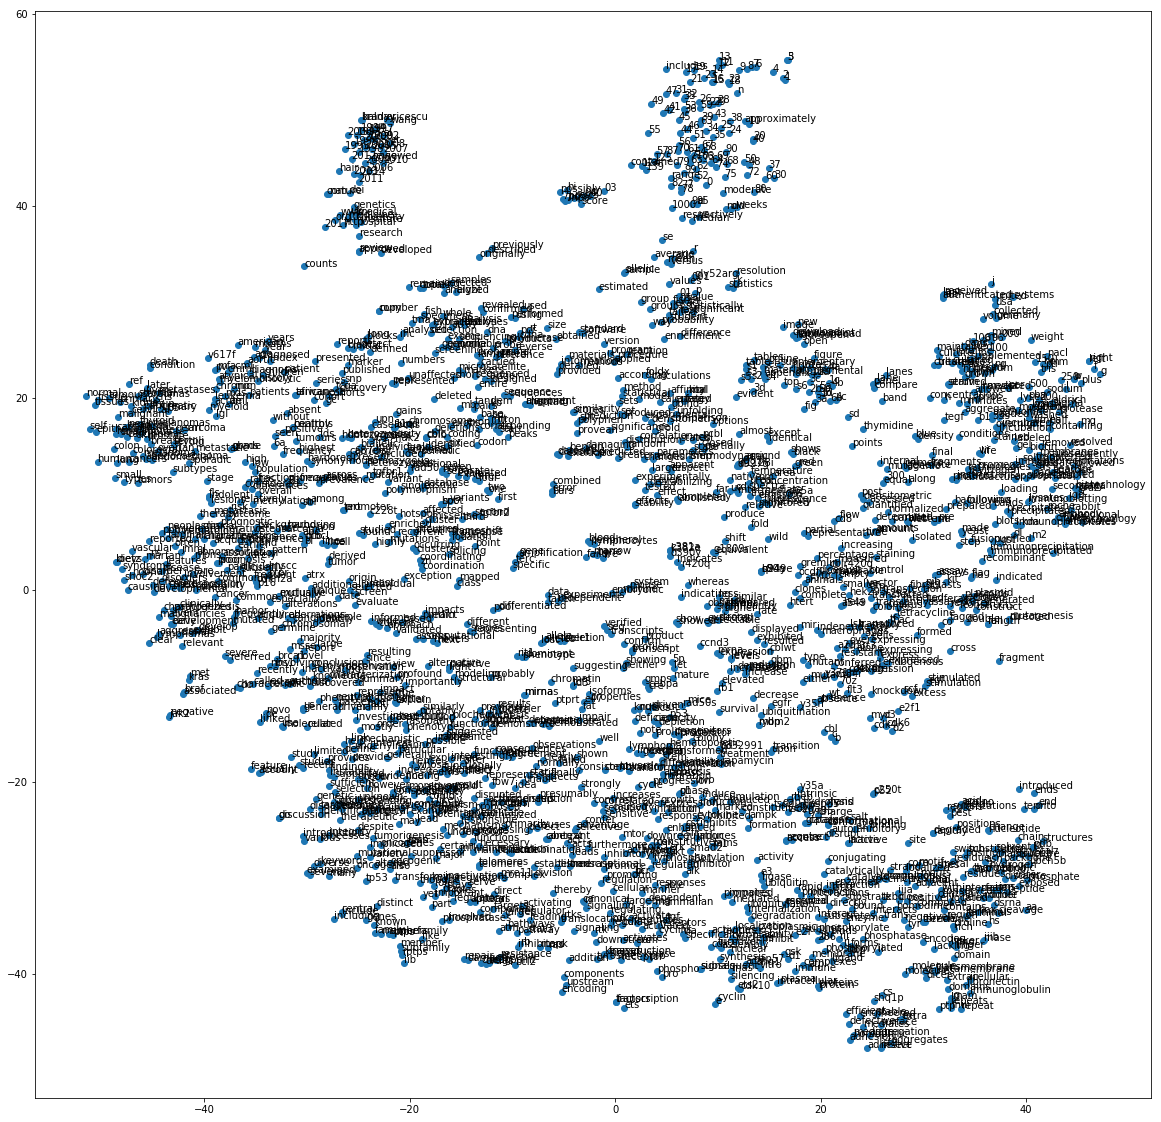

In [195]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos)

In [277]:
classified=[]
num_class=train_var["Class"].unique()

for i in range(len(num_class)):
    classified.append(i)
    print(classified)
    for j in range(train_var["Class"].size):
        if(train_var["Class"][j]==i):
            classified[i].append(train_text["Text"][j])
        

[0]
[0, 1]


AttributeError: 'int' object has no attribute 'append'

## Bag of Words

In [189]:
train_text=pd.read_csv("data/training_text", sep="\|\|", names=["Id","Text"], skiprows=1, engine='python')
test_text=pd.read_csv("data/test_text", sep="\|\|", names=["Id","Text"], skiprows=1, engine='python')

In [200]:
def clean_data(raw_text):
    letters_only = re.sub("[^a-zA-Z_0-9]", " ", raw_text)
    lowercase_only = letters_only.lower()
    words = lowercase_only.split()
    words = [w for w in words if not w in stopwords.words("english")]
    return(" ".join(words))

In [205]:
clean_train_text=[]
for i in range(train_text["Text"].size):
    clean_train_text.append(clean_data(train_text["Text"][i]))

KeyboardInterrupt: 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer=CountVectorizer(analyzer="word", tokenizer=None, preprocessor=None, stop_words=None, max_features=5000)
train_text_features=vectorizer.fit_transform(clean_train_text)
train_text_features=train_text_features.toarray()

In [ ]:
print(train_text_features.shape())

In [ ]:
vocab = vectorizer.get_feature_names()
print(vocab)